In [20]:
import torch
import torch.nn as nn
from torchvision.datasets import CIFAR10
import os

In [9]:
import matplotlib.pyplot as plt
import torchvision.transforms as T
import numpy as np
plt.rcParams["savefig.bbox"] = 'tight'

def show(imgs):
    fix, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = T.ToPILImage()(img.to('cpu'))
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

In [10]:
os.getcwd()
torch.manual_seed(0xDEAD)

cwd = '/home/stankvla/Projects/Python/PytorchExamples/ComputerVision/EfficientNet_image_classification'

In [11]:
cifar10_train = CIFAR10(os.path.join(cwd, 'train'), download=True)
cifar10_test = CIFAR10(os.path.join(cwd, 'test'), train=False, download=True)

Files already downloaded and verified
Files already downloaded and verified


In [13]:
len(cifar10_train), len(cifar10_test)

(50000, 10000)

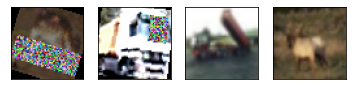

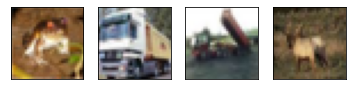

In [183]:
to_tensor_tr = T.ToTensor()
new_resolution = 56
jit_transforms = nn.Sequential(
    # T.RandomEqualize(p=1),
    # T.RandomPosterize(7, p=1),
    T.Resize(new_resolution),
    T.RandomApply(nn.ModuleList([
        T.RandomResizedCrop(new_resolution, scale=(0.7, 1.0)),
        T.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.01),
        T.RandomAdjustSharpness(sharpness_factor=5), # todo extend []

        T.RandomErasing(value='random'),

        T.RandomRotation((-20, 20)),
        T.RandomPerspective(distortion_scale=0.2),
        T.RandomHorizontalFlip(),
    ]))
)
cnt = 4
imgs_tran = []
imgs_orig = []
for i, (img, label) in enumerate(cifar10_train):
    if i == cnt:
        break
    t_img = to_tensor_tr(img)
    imgs_orig.append(t_img)
    imgs_tran.append(jit_transforms(t_img))
show(imgs_tran)
show(imgs_orig)